# Loan Approval Prediction Project

This notebook presents a complete machine learning pipeline for predicting
loan approval decisions using multiple classification models.
The workflow includes data preprocessing, exploratory data analysis (EDA),
model training, hyperparameter tuning, evaluation, and result visualization.


## Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib
sns.set(style='whitegrid')


## Load dataset


In [2]:
# Load dataset

csv_path = "/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv"   
if not os.path.exists(csv_path):
    print("Warning: loan_data.csv not found in notebook directory. Please upload the dataset file to Kaggle and re-run.")
else:
    df = pd.read_csv(csv_path)
    print("Loaded:", df.shape)

Loaded: (4269, 13)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.describe(include = "object")

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


## Data Preprocessing

Data preprocessing steps included:
- Removing non-informative identifiers
- Encoding categorical variables
- Handling invalid or inconsistent values
- Feature scaling


In [6]:
df.drop('loan_id', axis=1, inplace=True)


In [7]:
#df.drop('loan_id', axis=1, inplace=True)
df.columns


Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [9]:
df[' residential_assets_value'] = df[' residential_assets_value'].clip(lower=0)


In [10]:
df[' loan_status'].value_counts(normalize=True)


 loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [11]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

cat_cols, num_cols


(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
        ' luxury_assets_value', ' bank_asset_value'],
       dtype='object'))

In [12]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [13]:
df[' education'].unique()


array([' Graduate', ' Not Graduate'], dtype=object)

In [14]:
df[' self_employed'].unique()


array([' No', ' Yes'], dtype=object)

In [15]:
df[' loan_status'].unique()


array([' Approved', ' Rejected'], dtype=object)

In [16]:
df[' education'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df[' self_employed'] = df[' self_employed'].map({' Yes': 1, ' No': 0})
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})


In [17]:
df[[' education', ' self_employed', ' loan_status']].head()


,education,self_employed,loan_status
0,1,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


## Exploratory Data Analysis (EDA)

Exploratory analysis was conducted to understand the distribution of features
and their relationship with the loan approval decision. Visualizations and
statistical summaries were used to identify key patterns, correlations, and
potential issues such as skewness and class imbalance.


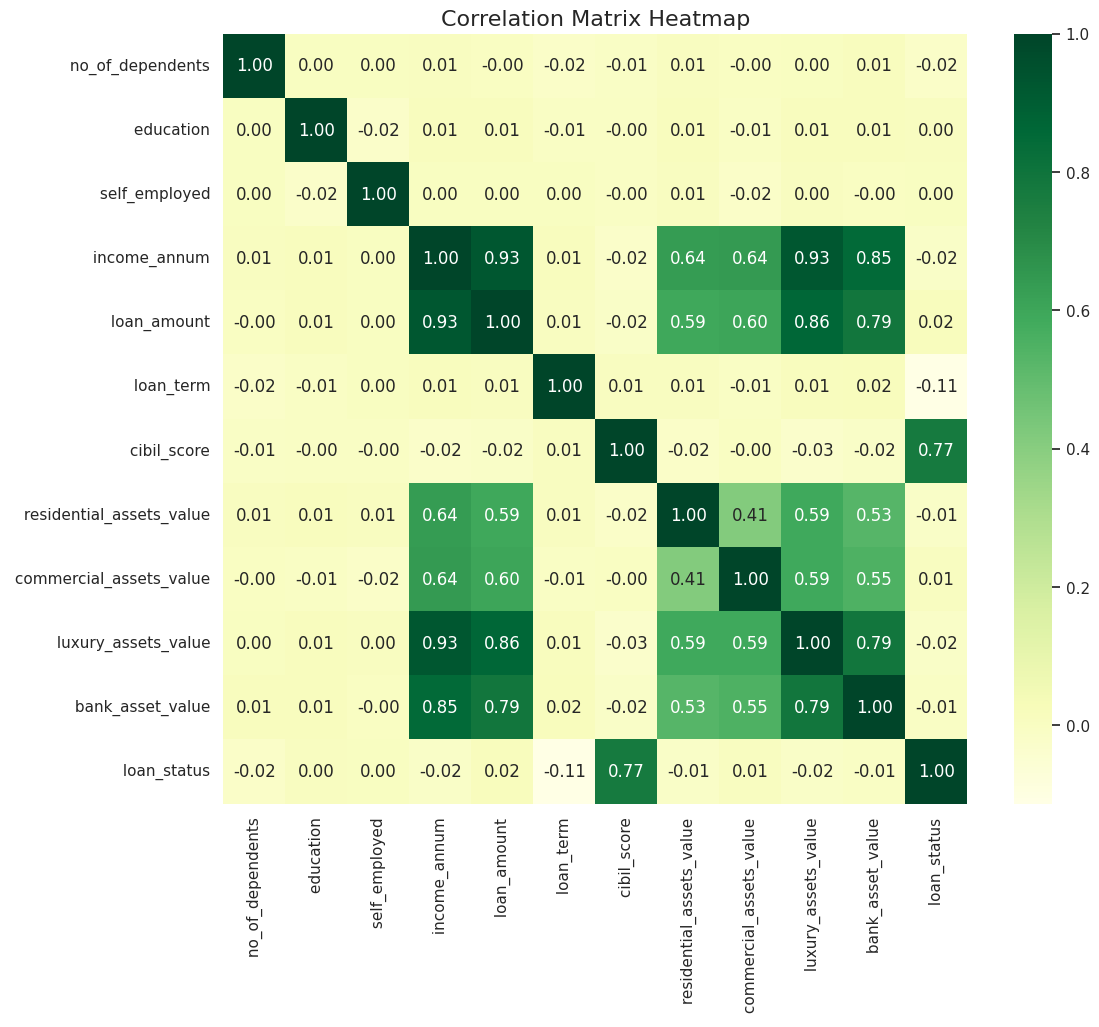

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="YlGn"
    #YlGn
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


<Axes: xlabel=' loan_status', ylabel='count'>

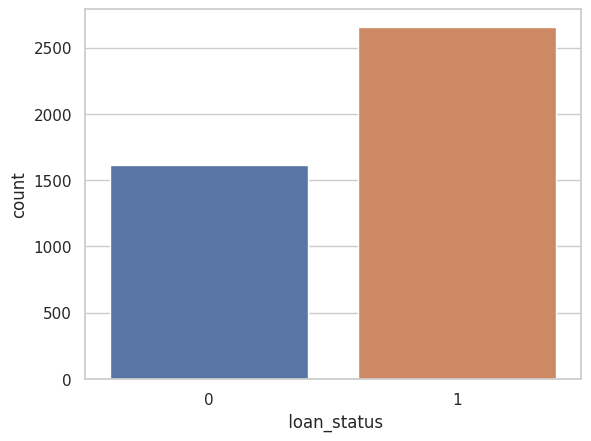

In [19]:
sns.countplot(x=' loan_status', data=df)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

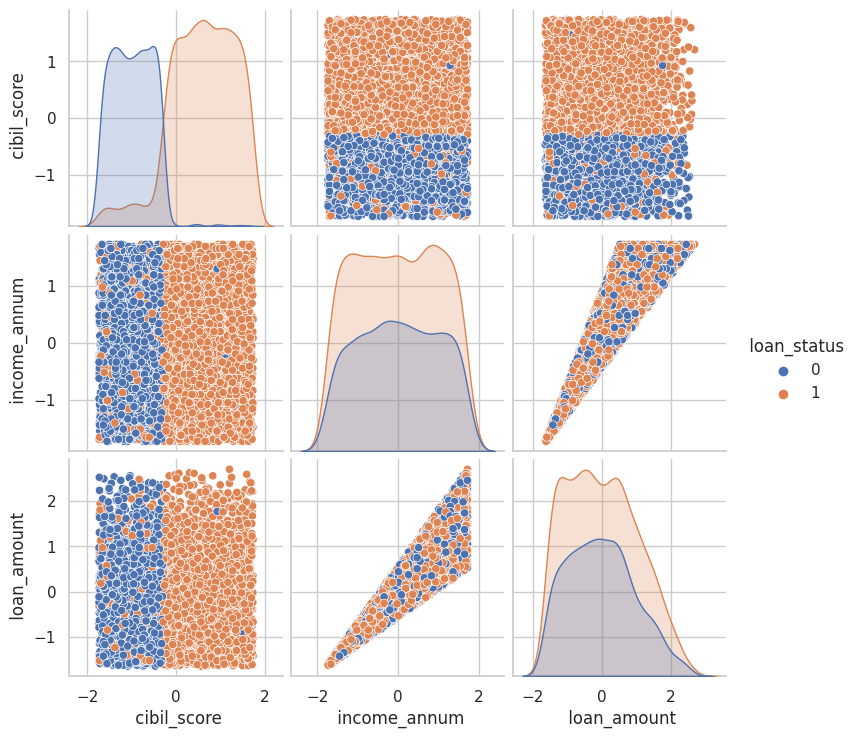

In [20]:
sns.pairplot(
    df[[' loan_status', ' cibil_score', ' income_annum', ' loan_amount']],
    hue=' loan_status'
)


<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

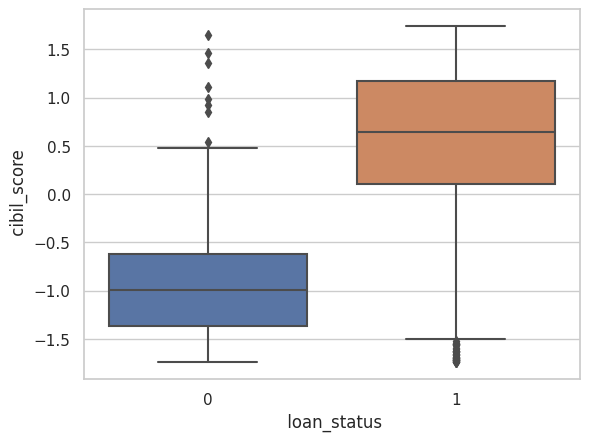

In [21]:
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)


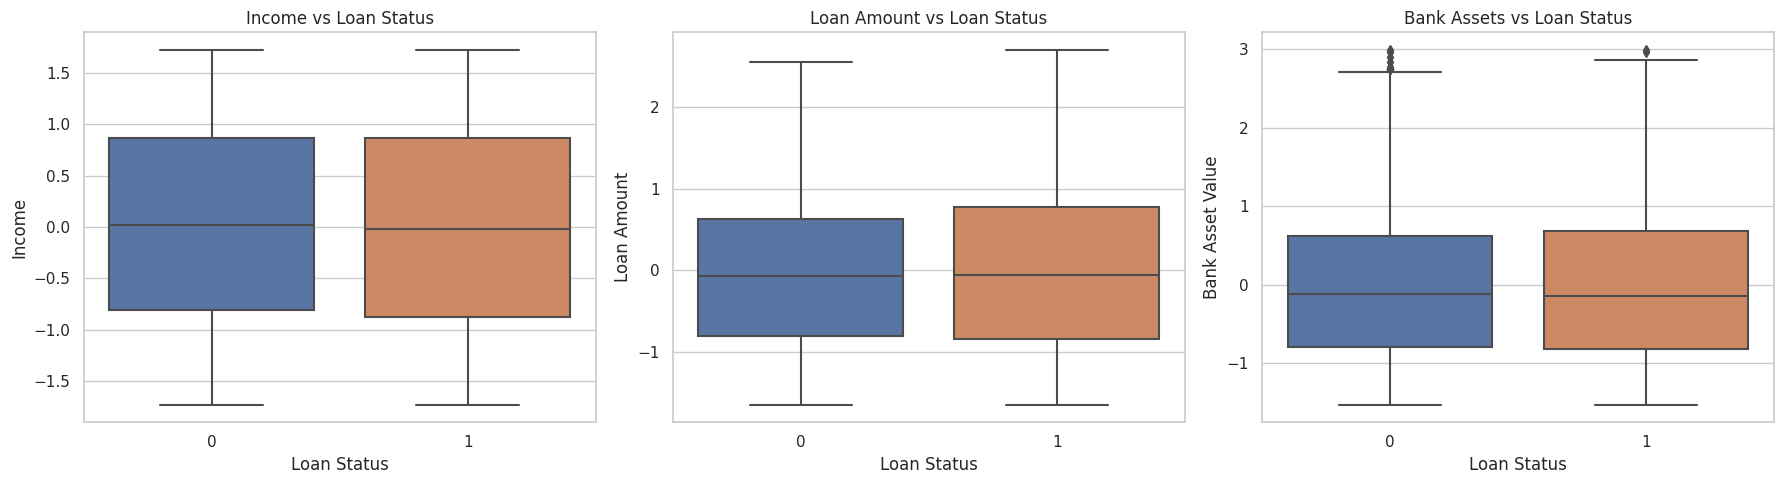

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Income vs Loan Status
sns.boxplot(
    x=' loan_status',
    y=' income_annum',
    data=df,
    ax=axes[0]
)
axes[0].set_title("Income vs Loan Status")
axes[0].set_xlabel("Loan Status")
axes[0].set_ylabel("Income")

# Loan Amount vs Loan Status
sns.boxplot(
    x=' loan_status',
    y=' loan_amount',
    data=df,
    ax=axes[1]
)
axes[1].set_title("Loan Amount vs Loan Status")
axes[1].set_xlabel("Loan Status")
axes[1].set_ylabel("Loan Amount")

# Bank Assets vs Loan Status
sns.boxplot(
    x=' loan_status',
    y=' bank_asset_value',
    data=df,
    ax=axes[2]
)
axes[2].set_title("Bank Assets vs Loan Status")
axes[2].set_xlabel("Loan Status")
axes[2].set_ylabel("Bank Asset Value")

plt.tight_layout()
plt.show()


## Splitting the dataset into training and test sets


In [23]:
# Features & Target
target = ' loan_status'
X = df.drop(columns=[target])
y = df[target]
#Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (2988, 11) Test: (1281, 11)


## Model Training (Baseline Models)

Several baseline machine learning models were trained without hyperparameter
tuning to establish initial performance benchmarks. These models include
Logistic Regression, Decision Tree, Random Forest, AdaBoost, and SVM.


In [25]:
# Evaluation helper
def evaluate_model(model, X_train, X_test, y_train, y_test, name="model"):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics = {
        'model': name,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train, zero_division=0),
        'test_precision': precision_score(y_test, y_pred_test, zero_division=0),
        'train_recall': recall_score(y_train, y_pred_train, zero_division=0),
        'test_recall': recall_score(y_test, y_pred_test, zero_division=0),
        'train_f1': f1_score(y_train, y_pred_train, zero_division=0),
        'test_f1': f1_score(y_test, y_pred_test, zero_division=0),
    }
    return metrics

## Logistic Regression

In [26]:
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
lr_l2.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [27]:
lr_l2_results = evaluate_model(
    lr_l2, X_train, X_test, y_train, y_test, "Logistic Regression (L2)"
)

lr_l2_results

{'model': 'Logistic Regression (L2)',
 'train_accuracy': 0.9180053547523427,
 'test_accuracy': 0.9195940671350508,
 'train_precision': 0.9334049409237379,
 'test_precision': 0.9326683291770573,
 'train_recall': 0.9349112426035503,
 'test_recall': 0.9385194479297365,
 'train_f1': 0.9341574845471647,
 'test_f1': 0.9355847404627892}

In [28]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lr_l1.fit(X_train, y_train)



LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [29]:
lr_l1_results = evaluate_model(
    lr_l1, X_train, X_test, y_train, y_test, "Logistic Regression (L1)"
)

lr_l1_results


{'model': 'Logistic Regression (L1)',
 'train_accuracy': 0.9176706827309237,
 'test_accuracy': 0.9188134270101483,
 'train_precision': 0.9329039184111648,
 'test_precision': 0.9315068493150684,
 'train_recall': 0.9349112426035503,
 'test_recall': 0.9385194479297365,
 'train_f1': 0.9339065018807093,
 'test_f1': 0.9349999999999999}

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_gini.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [31]:
dt_gini_results = evaluate_model(
    dt_gini, X_train, X_test, y_train, y_test, "Decision Tree (Gini)"
)

dt_gini_results


{'model': 'Decision Tree (Gini)',
 'train_accuracy': 0.9722222222222222,
 'test_accuracy': 0.9734582357533177,
 'train_precision': 0.9916943521594684,
 'test_precision': 0.9897304236200257,
 'train_recall': 0.9634211941904249,
 'test_recall': 0.9673776662484316,
 'train_f1': 0.9773533424283765,
 'test_f1': 0.9784263959390863}

In [32]:
dt_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [33]:
dt_entropy_results = evaluate_model(
    dt_entropy, X_train, X_test, y_train, y_test, "Decision Tree (Entropy)"
)

dt_entropy_results


{'model': 'Decision Tree (Entropy)',
 'train_accuracy': 0.9698795180722891,
 'test_accuracy': 0.9726775956284153,
 'train_precision': 0.993858179787828,
 'test_precision': 0.9948051948051948,
 'train_recall': 0.9575040344271114,
 'test_recall': 0.9611041405269761,
 'train_f1': 0.9753424657534248,
 'test_f1': 0.9776643267389916}

## RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [35]:
rf_results = evaluate_model(
    rf, X_train, X_test, y_train, y_test, "Random Forest"
)

rf_results


{'model': 'Random Forest',
 'train_accuracy': 0.9933065595716198,
 'test_accuracy': 0.9812646370023419,
 'train_precision': 0.9930294906166219,
 'test_precision': 0.987389659520807,
 'train_recall': 0.9962345346960731,
 'test_recall': 0.9824341279799247,
 'train_f1': 0.9946294307196563,
 'test_f1': 0.9849056603773585}

## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)

ada.fit(X_train, y_train)



AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [37]:
ada_results = evaluate_model(
    ada, X_train, X_test, y_train, y_test, "AdaBoost"
)

ada_results


{'model': 'AdaBoost',
 'train_accuracy': 0.9802543507362784,
 'test_accuracy': 0.975800156128025,
 'train_precision': 0.9817987152034261,
 'test_precision': 0.9775561097256857,
 'train_recall': 0.9865519096288327,
 'test_recall': 0.9836888331242158,
 'train_f1': 0.9841695733834182,
 'test_f1': 0.9806128830519074}

## SVM

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)



SVC(random_state=42)

In [39]:
svm_results = evaluate_model(
    svm, X_train, X_test, y_train, y_test, "SVM"
)

svm_results


{'model': 'SVM',
 'train_accuracy': 0.9538152610441767,
 'test_accuracy': 0.9461358313817331,
 'train_precision': 0.9663956639566396,
 'test_precision': 0.9631043256997456,
 'train_recall': 0.9591178052716515,
 'test_recall': 0.9498117942283564,
 'train_f1': 0.9627429805615552,
 'test_f1': 0.9564118761844599}

## Baseline Models Comparison

In this section, baseline machine learning models are compared using their
test-set performance before applying any hyperparameter tuning.
These models serve as reference benchmarks to evaluate the impact of tuning.

The comparison focuses on:
- Accuracy
- Precision
- Recall
- F1-score



In [40]:
results_df = pd.DataFrame([
    lr_l2_results,
    lr_l1_results,
    dt_gini_results,
    dt_entropy_results,
    rf_results,
    ada_results,
    svm_results
])

results_df.set_index('model', inplace=True)
results_df


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
model,,,,,,,,
Logistic Regression (L2),0.918005,0.919594,0.933405,0.932668,0.934911,0.938519,0.934157,0.935585
Logistic Regression (L1),0.917671,0.918813,0.932904,0.931507,0.934911,0.938519,0.933907,0.935000
Decision Tree (Gini),0.972222,0.973458,0.991694,0.989730,0.963421,0.967378,0.977353,0.978426
Decision Tree (Entropy),0.969880,0.972678,0.993858,0.994805,0.957504,0.961104,0.975342,0.977664
Random Forest,0.993307,0.981265,0.993029,0.987390,0.996235,0.982434,0.994629,0.984906
AdaBoost,0.980254,0.975800,0.981799,0.977556,0.986552,0.983689,0.984170,0.980613
SVM,0.953815,0.946136,0.966396,0.963104,0.959118,0.949812,0.962743,0.956412


In [41]:
test_metrics_df = results_df[[
    'test_accuracy',
    'test_precision',
    'test_recall',
    'test_f1'
]]

test_metrics_df.style.format("{:.3f}").highlight_max(color='lightgreen')


,test_accuracy,test_precision,test_recall,test_f1
model,,,,
Logistic Regression (L2),0.920,0.933,0.939,0.936
Logistic Regression (L1),0.919,0.932,0.939,0.935
Decision Tree (Gini),0.973,0.990,0.967,0.978
Decision Tree (Entropy),0.973,0.995,0.961,0.978
Random Forest,0.981,0.987,0.982,0.985
AdaBoost,0.976,0.978,0.984,0.981
SVM,0.946,0.963,0.950,0.956


## Model Training with Hyperparameter Tuning

GridSearchCV was applied to selected models to optimize hyperparameters and
reduce overfitting. Stratified cross-validation and F1-score were used to ensure
fair and balanced evaluation.


In [44]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, random_state=42)

param_grid_lr = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'solver': ['saga'],
        'l1_ratio': [0.2, 0.5, 0.8]
    }
]

grid_lr = GridSearchCV(
    log_reg,
    param_grid_lr,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 1], 'l1_ratio': [0.2, 0.5, 0.8],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='f1')

In [46]:
print("Best Parameters:", grid_lr.best_params_)
print("Best CV F1-score:", grid_lr.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV F1-score: 0.9516491058361582


In [47]:
lr_best = grid_lr.best_estimator_
lr_tuned_results = evaluate_model(
    lr_best, X_train, X_test, y_train, y_test, "Logistic Regression (Tuned)"
)
lr_tuned_results


{'model': 'Logistic Regression (Tuned)',
 'train_accuracy': 0.9327309236947792,
 'test_accuracy': 0.9461358313817331,
 'train_precision': 0.9683615819209039,
 'test_precision': 0.9802110817941952,
 'train_recall': 0.9220010758472297,
 'test_recall': 0.9322459222082811,
 'train_f1': 0.9446128410030311,
 'test_f1': 0.9556270096463022}

## DecisionTree

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}

grid_dt = GridSearchCV(
    dt,
    param_grid_dt,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [5, 10, 20]},
             scoring='f1')

In [49]:
print("Best Parameters:", grid_dt.best_params_)
print("Best CV F1-score:", grid_dt.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best CV F1-score: 0.9817655388984976


In [50]:
dt_best = grid_dt.best_estimator_

dt_tuned_results = evaluate_model(
    dt_best, X_train, X_test, y_train, y_test, "Decision Tree (Tuned)"
)
dt_tuned_results


{'model': 'Decision Tree (Tuned)',
 'train_accuracy': 0.9849397590361446,
 'test_accuracy': 0.9804839968774395,
 'train_precision': 0.9850267379679144,
 'test_precision': 0.9812967581047382,
 'train_recall': 0.9908552985476062,
 'test_recall': 0.9874529485570891,
 'train_f1': 0.98793242156074,
 'test_f1': 0.9843652282676674}

## RandomForest

In [51]:
import pandas as pd

dt_feature_importance = pd.Series(
    dt_best.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

dt_feature_importance


cibil_score                 0.853525
loan_term                   0.081515
loan_amount                 0.027991
income_annum                0.023873
luxury_assets_value         0.006331
no_of_dependents            0.002790
education                   0.001529
residential_assets_value    0.001478
commercial_assets_value     0.000967
self_employed               0.000000
bank_asset_value            0.000000
dtype: float64

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 10], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [53]:
print("Best Parameters:", grid_rf.best_params_)
print("Best CV F1-score:", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV F1-score: 0.9798675769071185


In [54]:
rf_best = grid_rf.best_estimator_

rf_tuned_results = evaluate_model(
    rf_best, X_train, X_test, y_train, y_test, "Random Forest (Tuned)"
)
rf_tuned_results


{'model': 'Random Forest (Tuned)',
 'train_accuracy': 0.9963186077643909,
 'test_accuracy': 0.9843871975019516,
 'train_precision': 0.9941176470588236,
 'test_precision': 0.9874529485570891,
 'train_recall': 1.0,
 'test_recall': 0.9874529485570891,
 'train_f1': 0.9970501474926253,
 'test_f1': 0.9874529485570891}

##  AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_ada = GridSearchCV(
    ada,
    param_grid_ada,
    scoring='f1',
    cv=cv,
    n_jobs=-1
)

grid_ada.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [56]:
print("Best Parameters:", grid_ada.best_params_)
print("Best CV F1-score:", grid_ada.best_score_)


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best CV F1-score: 0.9776086639658045


In [57]:
ada_best = grid_ada.best_estimator_

ada_tuned_results = evaluate_model(
    ada_best, X_train, X_test, y_train, y_test, "AdaBoost (Tuned)"
)
ada_tuned_results


{'model': 'AdaBoost (Tuned)',
 'train_accuracy': 0.9879518072289156,
 'test_accuracy': 0.9765807962529274,
 'train_precision': 0.9876939539860888,
 'test_precision': 0.9823899371069182,
 'train_recall': 0.993006993006993,
 'test_recall': 0.9799247176913425,
 'train_f1': 0.9903433476394851,
 'test_f1': 0.9811557788944724}

## Tuned Models Comparison

In this section, models optimized using hyperparameter tuning (GridSearchCV)
are compared separately from baseline models.
This allows for a clear assessment of how tuning improves model performance
and reduces overfitting.

The same evaluation metrics are used to ensure a fair comparison.


In [58]:
tuned_results_df = pd.DataFrame([
    lr_tuned_results,
    dt_tuned_results,
    rf_tuned_results,
    ada_tuned_results,
    svm_results
]).set_index('model')

tuned_results_df.style.format("{:.3f}").highlight_max(
    subset=['test_f1'],
    color='lightgreen'
)


,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
model,,,,,,,,
Logistic Regression (Tuned),0.933,0.946,0.968,0.980,0.922,0.932,0.945,0.956
Decision Tree (Tuned),0.985,0.980,0.985,0.981,0.991,0.987,0.988,0.984
Random Forest (Tuned),0.996,0.984,0.994,0.987,1.000,0.987,0.997,0.987
AdaBoost (Tuned),0.988,0.977,0.988,0.982,0.993,0.980,0.990,0.981
SVM,0.954,0.946,0.966,0.963,0.959,0.950,0.963,0.956


## Model Comparison

All baseline and tuned models were compared in a unified table using test-set
metrics. The F1-score was used as the primary criterion for selecting the best
model due to class imbalance in loan approval outcomes.


In [59]:
all_results = pd.DataFrame([
    lr_l2_results,
    lr_l1_results,
    dt_gini_results,
    dt_entropy_results,
    rf_results,
    ada_results,
    svm_results,
    lr_tuned_results,
    dt_tuned_results,
    rf_tuned_results,
    ada_tuned_results
])


In [60]:
all_results_sorted = (
    all_results
    .sort_values(by='test_f1', ascending=False)
    .reset_index(drop=True)
)

all_results_sorted


,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random Forest (Tuned),0.996319,0.984387,0.994118,0.987453,1.000000,0.987453,0.997050,0.987453
1,Random Forest,0.993307,0.981265,0.993029,0.987390,0.996235,0.982434,0.994629,0.984906
2,Decision Tree (Tuned),0.984940,0.980484,0.985027,0.981297,0.990855,0.987453,0.987932,0.984365
3,AdaBoost (Tuned),0.987952,0.976581,0.987694,0.982390,0.993007,0.979925,0.990343,0.981156
4,AdaBoost,0.980254,0.975800,0.981799,0.977556,0.986552,0.983689,0.984170,0.980613
5,Decision Tree (Gini),0.972222,0.973458,0.991694,0.989730,0.963421,0.967378,0.977353,0.978426
6,Decision Tree (Entropy),0.969880,0.972678,0.993858,0.994805,0.957504,0.961104,0.975342,0.977664
7,SVM,0.953815,0.946136,0.966396,0.963104,0.959118,0.949812,0.962743,0.956412
8,Logistic Regression (Tuned),0.932731,0.946136,0.968362,0.980211,0.922001,0.932246,0.944613,0.955627
9,Logistic Regression (L2),0.918005,0.919594,0.933405,0.932668,0.934911,0.938519,0.934157,0.935585


In [63]:
# Select columns for comparison
compare_df = all_results_sorted[[
    'model',
    'test_accuracy',
    'test_precision',
    'test_recall',
    'test_f1'
]]

# Style numeric columns only
styled_compare_df = (
    compare_df
    .style
    .format({
        'test_accuracy': "{:.3f}",
        'test_precision': "{:.3f}",
        'test_recall': "{:.3f}",
        'test_f1': "{:.3f}",
    })
    .highlight_max(
        subset=['test_f1'],
        color='lightgreen'
    )
)

styled_compare_df


,model,test_accuracy,test_precision,test_recall,test_f1
0,Random Forest (Tuned),0.984,0.987,0.987,0.987
1,Random Forest,0.981,0.987,0.982,0.985
2,Decision Tree (Tuned),0.980,0.981,0.987,0.984
3,AdaBoost (Tuned),0.977,0.982,0.980,0.981
4,AdaBoost,0.976,0.978,0.984,0.981
5,Decision Tree (Gini),0.973,0.990,0.967,0.978
6,Decision Tree (Entropy),0.973,0.995,0.961,0.978
7,SVM,0.946,0.963,0.950,0.956
8,Logistic Regression (Tuned),0.946,0.980,0.932,0.956
9,Logistic Regression (L2),0.920,0.933,0.939,0.936


In [64]:
best_model_name = all_results_sorted.loc[0, 'model']
best_model_name


'Random Forest (Tuned)'

## Performance Visualization

Visualization techniques were used to interpret and compare model performance,
including:
- F1-score comparison across models
- Accuracy vs F1-score analysis
- Confusion matrix of the best model
- ROC curve
- Feature importance (for tree-based models)


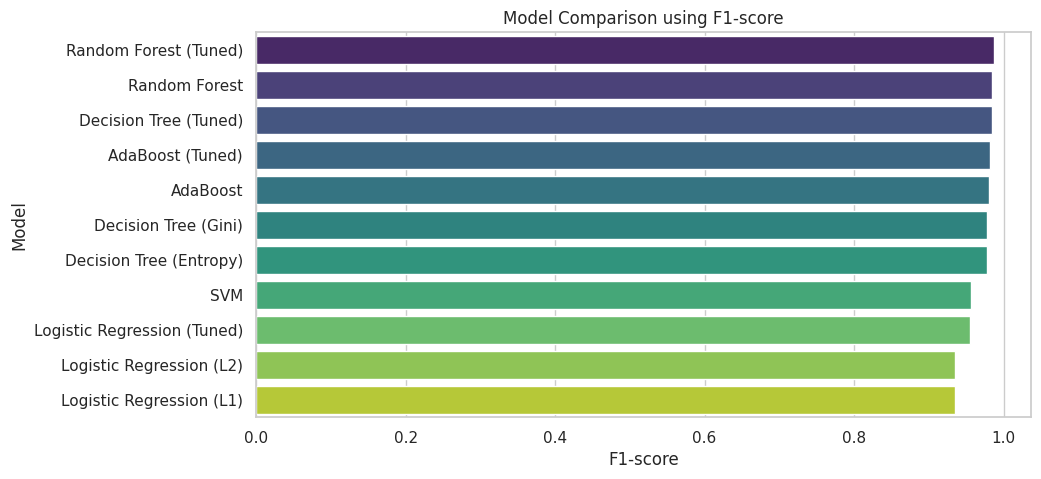

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(
    x='test_f1',
    y='model',
    data=compare_df,
    palette='viridis'
)

plt.title("Model Comparison using F1-score")
plt.xlabel("F1-score")
plt.ylabel("Model")
plt.show()


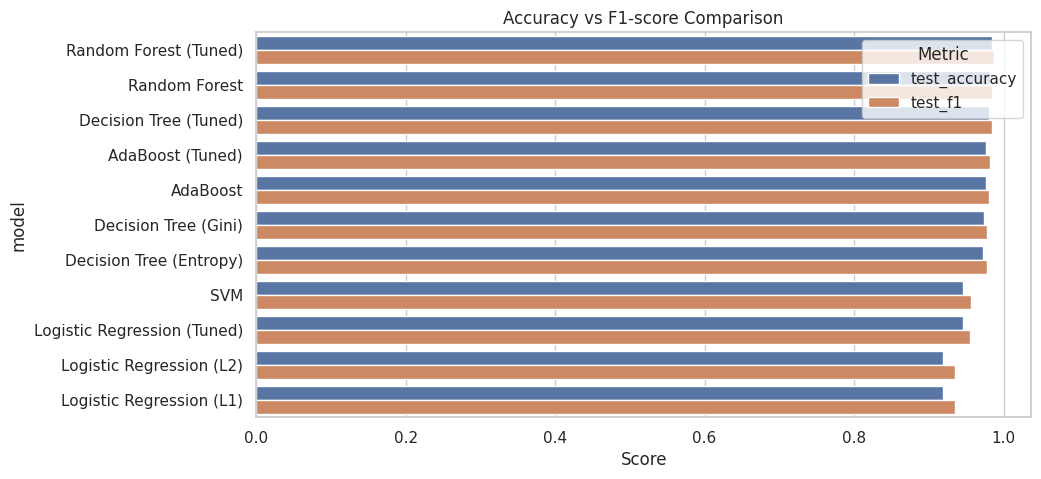

In [67]:
compare_melted = compare_df.melt(
    id_vars='model',
    value_vars=['test_accuracy', 'test_f1'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10,5))
sns.barplot(
    x='Score',
    y='model',
    hue='Metric',
    data=compare_melted
)

plt.title("Accuracy vs F1-score Comparison")
plt.show()


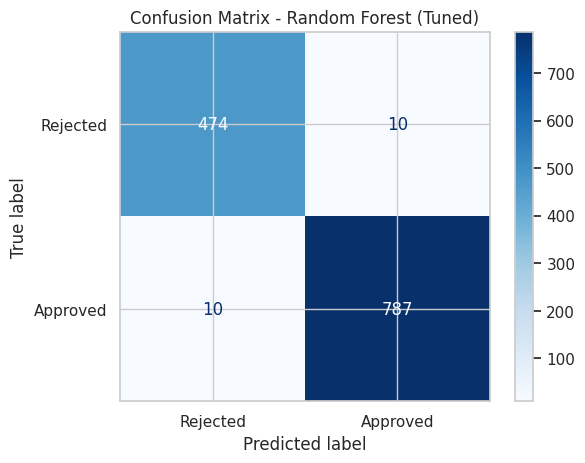

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = models_map[best_model_name]

cm = confusion_matrix(y_test, best_model.predict(X_test))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Rejected", "Approved"]
)

disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


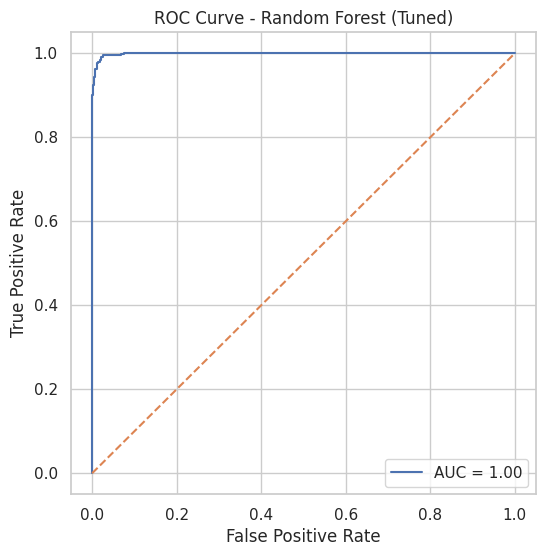

In [69]:
from sklearn.metrics import roc_curve, auc

if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test)[:,1]
else:
    y_prob = best_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - {best_model_name}")
plt.legend()
plt.show()


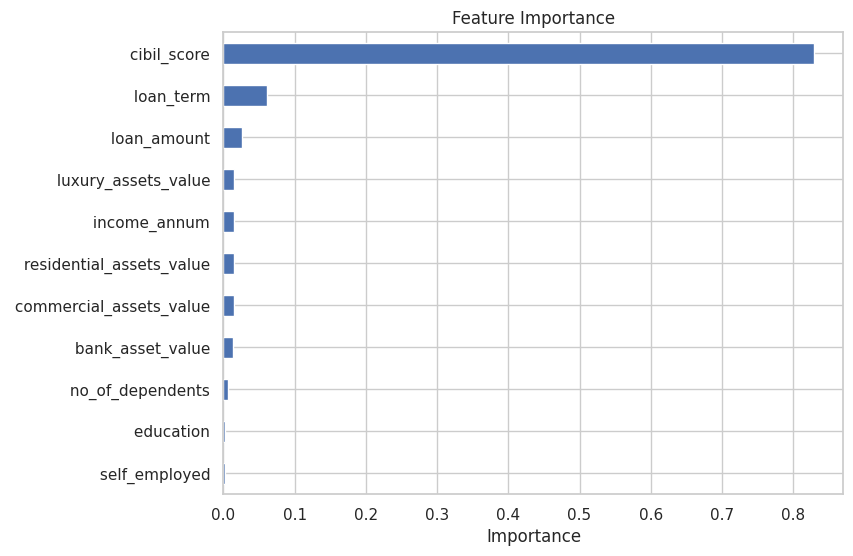

In [70]:
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(
        best_model.feature_importances_,
        index=X_train.columns
    ).sort_values()

    plt.figure(figsize=(8,6))
    importances.plot(kind='barh')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.show()


## Conclusion

The experimental results show that hyperparameter tuning significantly improves
model performance. While baseline models provide useful benchmarks, tuned models
offer superior predictive accuracy and robustness, making them more suitable
for real-world loan approval decision systems.
